In [5]:

# External library to plot results from full-wave solver
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/arnau/documents/ETHZ/Semester_Project_Master_Thesis/plotMithraPy')
import plotMiFuncs as pmf

# To make plot backgrounds white
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

# Other libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
from decimal import Decimal

fs = 14

pltpath = 'plots'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


bunch-sampling/bunch.txt
Mesh limits z -11.16955925223641 11.16955925223641


Mesh limits x -0.0045 0.0045
Mesh limits y -0.0045 0.0045


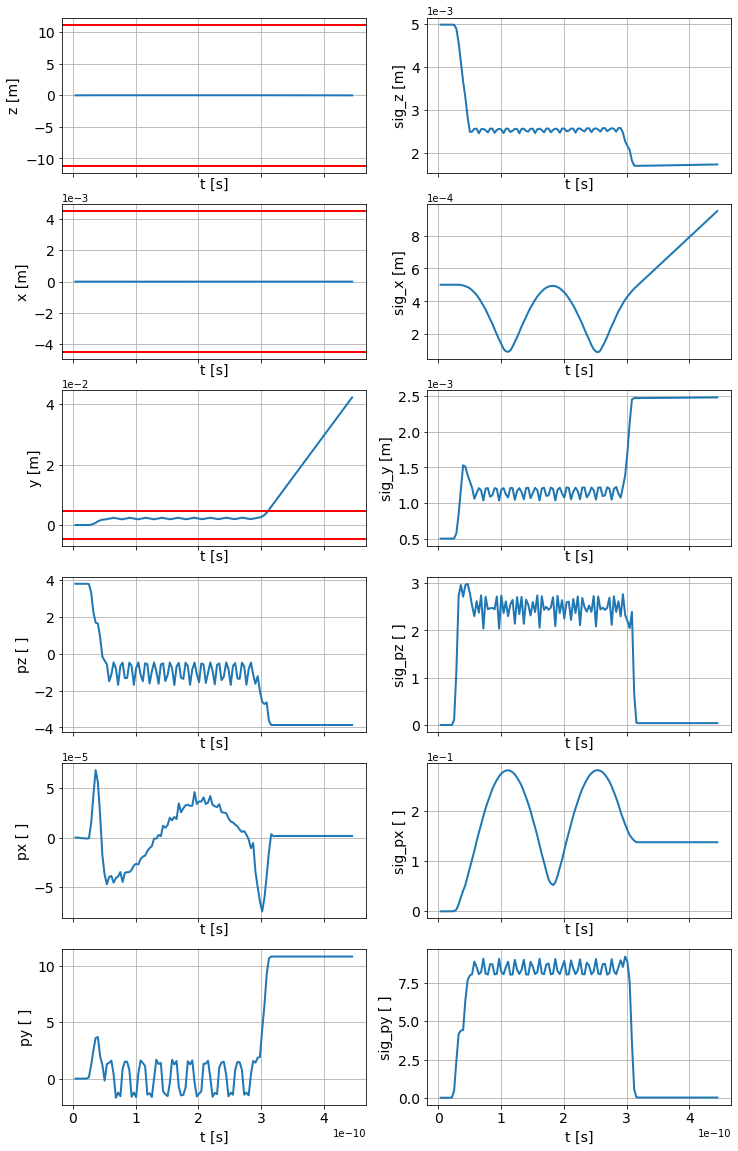

In [7]:
# Stats undulator
stats = pmf.importStat('bunch-sampling/bunch.txt', show = True)

names = [ 'z', 'sig_z', 'x', 'sig_x', 'y', 'sig_y',
             'pz', 'sig_pz', 'px', 'sig_px', 'py', 'sig_py']

fig, axs = plt.subplots( 6,2, figsize = ( 12, 20 ), sharex = True )
Ls = [9e-3, 9e-3, 5-3]  # Mesh lengths
K = 10.81
E = 44  # MeV
Ls[2] *= E / .511 / np.sqrt(1 + .5 * K**2)  # * gamma_
for i, ax in enumerate(axs.reshape(-1)):
    ax.grid()
    pmf.plotStat(ax, stats, quants = ['t',names[i]], factors = [1, 1], fs = fs, lw = 2)
# Draw mesh limits
xyz = ['x', 'y', 'z']
for j in range(3):
    i  = (2 + j) % 3
    print('Mesh limits', xyz[i], -.5 * Ls[i], .5 * Ls[i])
    axs[j,0].axhline(-.5 * Ls[i], lw = 2, color = 'r')
    axs[j,0].axhline(.5 * Ls[i], lw = 2, color = 'r')
    # axs[j,0].set_ylim(bottom = -.5 * Ls[i], top = .5 * Ls[i])  # Mesh limits as plot limits
# plt.savefig((pltpath + '/avg.png'),bbox_inches='tight')
plt.show()

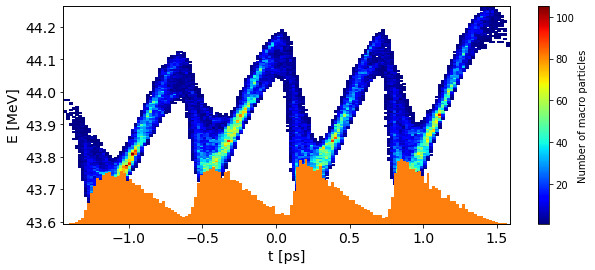

In [11]:
# Quantities to plot
qx = 't'
qy = 'E'

fig, ax = plt.subplots(figsize = (10, 4))
[x,y] = pmf.importScreenXY('bunch-screen/bunch-p#-screen#.txt', show = False, xquant = qx, yquant = qy, index_screen = -1)
pmf.plotScreenXY(ax, x, y, [qx, qy], type = 'hist2d-hist', factors = [-1e12,1e-6], nbins = 150, color = 1, maxHH = .3)

# plt.savefig((pltpath + '/phaseSpace.png'),bbox_inches='tight')
plt.show()
